In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
npuntos = 50000
xdatos = np.linspace(-100, 100, npuntos)


In [3]:
#mostrando la cantidad de elementos
xdatos.shape

(50000,)

Se desea calcular los valores de **m** y $b$ para 

$$y = mx + b $$ 

datos puntos en $x$ e $y$

In [4]:
ruido = np.random.uniform(-1,1, npuntos)
#ruido = np.random.randn(npuntos)

In [5]:
yExper = -0.8*xdatos**2 -3.25*xdatos + 1.5 + ruido
#yExper = 0.5*xdatos+ 5 + ruido


In [6]:
yExper.shape

(50000,)

In [7]:
xDF = pd.DataFrame(data= xdatos , columns= ["X"])

In [8]:
xDF.head()

,X
0,-100.000
1,-99.996
2,-99.992
3,-99.988
4,-99.984


In [9]:
yDF = pd.DataFrame(data= yExper , columns= ["Y"])

In [10]:
yDF.head()

,Y
0,-7673.580149
1,-7672.035426
2,-7671.943517
3,-7670.731591
4,-7670.597395


In [11]:
datos = pd.concat([xDF, yDF], axis=1)

In [12]:
datos.head()

,X,Y
0,-100.000,-7673.580149
1,-99.996,-7672.035426
2,-99.992,-7671.943517
3,-99.988,-7670.731591
4,-99.984,-7670.597395


In [13]:
%matplotlib inline

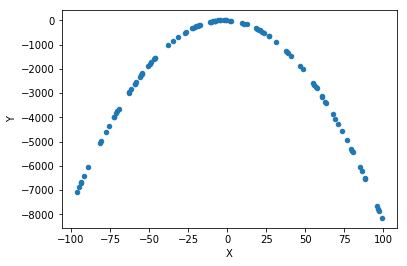

In [14]:
dd = datos.sample(n=100).plot(kind='scatter', x= 'X', y='Y')

# trabajando con batch
* lotes (grupos de datos)

In [15]:
tamLote = 10

In [16]:
np.random.uniform([2,1])

array([ 1.03999827,  1.        ])

In [17]:
m = tf.Variable(-0.6)

In [18]:
b = tf.Variable(1.66)

In [19]:
xEnt = tf.placeholder(tf.float32, [tamLote])

In [20]:
yEnt = tf.placeholder(tf.float32, [tamLote])
yEnt

<tf.Tensor 'Placeholder_1:0' shape=(10,) dtype=float32>

## definición del grafo

In [21]:
y_modelada = m * xEnt + b
y_modelada

<tf.Tensor 'add:0' shape=(10,) dtype=float32>

In [22]:
error = tf.reduce_sum(  tf.square((yEnt-y_modelada)/250) )
#error = tf.reduce_sum(  tf.sqrt(  (yEnt-y_modelada)**2) )

In [23]:
error

<tf.Tensor 'Sum:0' shape=() dtype=float32>

In [24]:
optimz = tf.train.GradientDescentOptimizer(learning_rate=0.001)


In [25]:
train = optimz.minimize(error)

In [26]:
init = tf.global_variables_initializer()

In [27]:
with tf.Session() as ss:
    
    ss.run(init)
    
    cuantos = 200
    
    for i in range(cuantos):
        #indices para hacer el entrenamiento por cada ejecucion
        indices = np.random.randint(npuntos, size=tamLote)
        #print(indices)
        #diccionario = {xEnt: xdatos[indices], yEnt: yExper[indices]}
        ss.run(train, feed_dict={xEnt: xdatos[indices], yEnt: yExper[indices]})
    
    mm , bb = ss.run([m,b])

In [28]:
mm

-1.2609082

In [29]:
bb

1.4901881

In [30]:
#error = tf.reduce_sum(  tf.sqrt(  (yEnt-y_modelada)**2) )

In [31]:
xx = np.linspace(-100,100, 100)
yy = mm*xx+bb

#plt.plot(xx,yy)

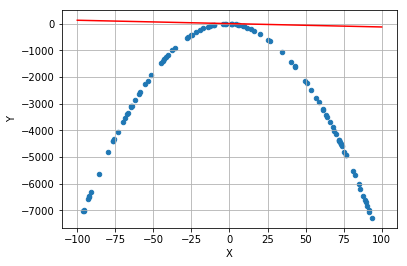

In [32]:
datos.sample(n=100).plot(kind='scatter', x= 'X', y='Y')
plt.plot(xx,yy, 'r')
plt.grid()
plt.rcParams['figure.figsize']=(10, 10)

# API tf.estimator 

In [35]:
npuntos = 50000
xdatos = np.linspace(-10, 10, npuntos)

In [36]:
ruido = np.random.uniform(-1,1, npuntos)
yExper = 0.5*xdatos+ 5 + ruido


In [37]:
columnas_caract  = [tf.feature_column.numeric_column('x', shape=[1]) ]

In [39]:
estimador = tf.estimator.LinearRegressor(feature_columns=columnas_caract)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_model_dir': '/tmp/tmpbbfo1w38', '_session_config': None}


In [40]:
from sklearn.model_selection import train_test_split


In [50]:
xTrain, xTest, yTrain, yTest = train_test_split(xdatos, yExper , test_size=0.20 )

In [51]:
xTrain.shape 

(40000,)

In [52]:
xTest.shape

(10000,)

## Se deben crear funciones para inyectar los valores

**input functions**

In [54]:
input_funct = tf.estimator.inputs.numpy_input_fn( {'x': xTrain }, 
                                                 yTrain, batch_size= 5,  
                                                 num_epochs=5000, shuffle = True  )

In [55]:
input_funct_train = tf.estimator.inputs.numpy_input_fn( {'x': xTrain }, 
                                                 yTrain, batch_size= 5,  
                                                 num_epochs=5000, shuffle = False )

In [65]:
input_funct_test = tf.estimator.inputs.numpy_input_fn( {'x': xTest }, 
                                                 yTest, batch_size= 5,  
                                                 num_epochs=500, shuffle = False )

In [58]:
estimador.train(input_fn=input_funct, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tmpbbfo1w38/model.ckpt-500
INFO:tensorflow:Saving checkpoints for 501 into /tmp/tmpbbfo1w38/model.ckpt.
INFO:tensorflow:loss = 1.19004, step = 501
INFO:tensorflow:global_step/sec: 758.989
INFO:tensorflow:loss = 0.582191, step = 601 (0.135 sec)
INFO:tensorflow:global_step/sec: 829.778
INFO:tensorflow:loss = 1.11051, step = 701 (0.120 sec)
INFO:tensorflow:global_step/sec: 814.123
INFO:tensorflow:loss = 2.57716, step = 801 (0.120 sec)
INFO:tensorflow:global_step/sec: 903.071
INFO:tensorflow:loss = 3.2146, step = 901 (0.111 sec)
INFO:tensorflow:global_step/sec: 891.917
INFO:tensorflow:loss = 1.86447, step = 1001 (0.112 sec)
INFO:tensorflow:global_step/sec: 987.546
INFO:tensorflow:loss = 1.32156, step = 1101 (0.101 sec)
INFO:tensorflow:global_step/sec: 916.363
INFO:tensorflow:loss = 0.29601, step = 1201 (0.109 sec)
INFO:tensorflow:global_step/sec: 865.281
INFO:tensorflow:loss = 1.55082, step = 1301 (0

## Evaluar el estimador

In [62]:
medicion_train = estimador.evaluate(input_fn=input_funct_train, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-06-14-22:09:42
INFO:tensorflow:Restoring parameters from /tmp/tmpbbfo1w38/model.ckpt-1500
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000]
INFO:tensorflow:Evaluati

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [61]:
medicion_train

{'average_loss': 0.33587432, 'global_step': 1500, 'loss': 1.6793716}

In [66]:
medicion_test = estimador.evaluate(input_fn=input_funct_test, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-06-14-22:13:24
INFO:tensorflow:Restoring parameters from /tmp/tmpbbfo1w38/model.ckpt-1500
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000]
INFO:tensorflow:Evaluati

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [67]:
medicion_test


{'average_loss': 0.33107686, 'global_step': 1500, 'loss': 1.6553843}

In [68]:
predictor = tf.estimator.inputs.numpy_input_fn( {'x': np.linspace(-10,10, 20)},
                                               shuffle=False  )

In [70]:
list(estimador.predict(input_fn=predictor))

INFO:tensorflow:Restoring parameters from /tmp/tmpbbfo1w38/model.ckpt-1500


[{'predictions': array([-0.06716728], dtype=float32)},
 {'predictions': array([ 0.46674442], dtype=float32)},
 {'predictions': array([ 1.00065565], dtype=float32)},
 {'predictions': array([ 1.53456736], dtype=float32)},
 {'predictions': array([ 2.06847882], dtype=float32)},
 {'predictions': array([ 2.60239029], dtype=float32)},
 {'predictions': array([ 3.13630176], dtype=float32)},
 {'predictions': array([ 3.67021322], dtype=float32)},
 {'predictions': array([ 4.20412493], dtype=float32)},
 {'predictions': array([ 4.73803616], dtype=float32)},
 {'predictions': array([ 5.27194786], dtype=float32)},
 {'predictions': array([ 5.80585909], dtype=float32)},
 {'predictions': array([ 6.33977079], dtype=float32)},
 {'predictions': array([ 6.87368202], dtype=float32)},
 {'predictions': array([ 7.40759373], dtype=float32)},
 {'predictions': array([ 7.94150543], dtype=float32)},
 {'predictions': array([ 8.47541618], dtype=float32)},
 {'predictions': array([ 9.00932884], dtype=float32)},
 {'predict

In [72]:
predicciones = []

for pred in estimador.predict(input_fn=predictor):
    
    predicciones.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from /tmp/tmpbbfo1w38/model.ckpt-1500


In [73]:
predicciones

[array([-0.06716728], dtype=float32),
 array([ 0.46674442], dtype=float32),
 array([ 1.00065565], dtype=float32),
 array([ 1.53456736], dtype=float32),
 array([ 2.06847882], dtype=float32),
 array([ 2.60239029], dtype=float32),
 array([ 3.13630176], dtype=float32),
 array([ 3.67021322], dtype=float32),
 array([ 4.20412493], dtype=float32),
 array([ 4.73803616], dtype=float32),
 array([ 5.27194786], dtype=float32),
 array([ 5.80585909], dtype=float32),
 array([ 6.33977079], dtype=float32),
 array([ 6.87368202], dtype=float32),
 array([ 7.40759373], dtype=float32),
 array([ 7.94150543], dtype=float32),
 array([ 8.47541618], dtype=float32),
 array([ 9.00932884], dtype=float32),
 array([ 9.54323959], dtype=float32),
 array([ 10.0771513], dtype=float32)]

In [80]:
indices = np.random.randint(0,npuntos, 300)

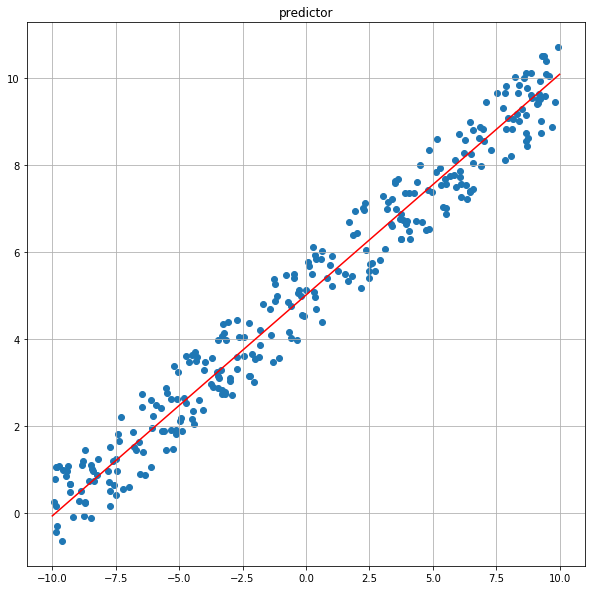

In [83]:
plt.scatter(xdatos[indices], yExper[indices])
plt.plot(np.linspace(-10,10, 20), predicciones, 'r')
plt.title('predictor')
plt.grid()